# Tarea 3 (Analisis de Datos)

### Importacion de las librerias

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importar los datos del csv y realizar proceso ETL

In [13]:
# Importar y cargar datos
df = pd.read_csv("datos.csv", sep=";")

# Limpieza y preparación de datos

# Revisar valores nulos
print("Valores nulos:\n", df.isnull().sum())

# Revisar duplicados
print("\nDuplicados:", df.duplicated().sum())

# Eliminamos duplicados si hay
df = df.drop_duplicates()

Valores nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicados: 240


### Resumen estadistico

In [14]:
# Resumen estadistico
print("\nResumen Estadistico:\n", df.describe())


Resumen Estadistico:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000       

### Matriz de Correlacion

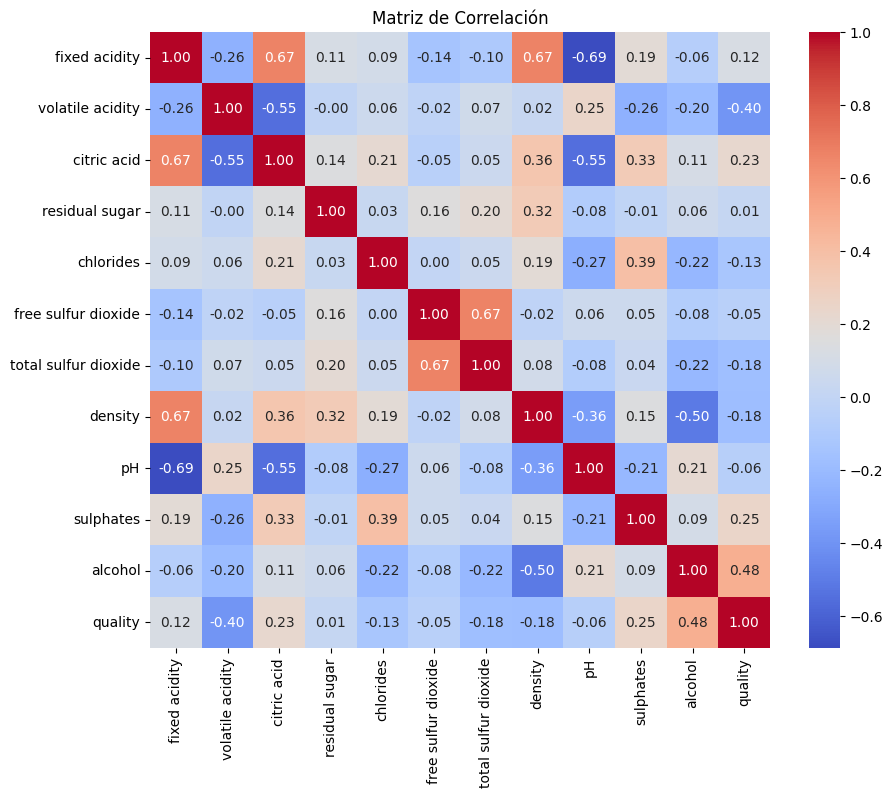

Correlación entre Alcohol y Calidad: 0.48


In [31]:
# Matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Calcular la correlación entre 'alcohol' y 'quality'
correlation = df['alcohol'].corr(df['quality'])
print(f"Correlación entre Alcohol y Calidad: {correlation:.2f}")


### Histograma de la calidad del vino

C:\Users\brian\AppData\Local\Temp\ipykernel_9444\3749614435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["quality"], palette="viridis")


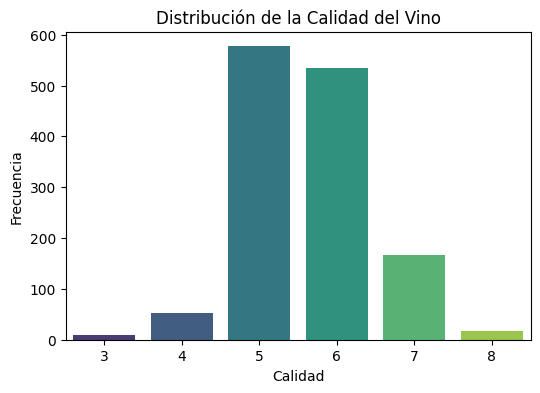

Top 3 calidades más frecuentes:
quality
5    577
6    535
7    167
Name: count, dtype: int64


In [32]:
# Histograma de la calidad del vino
plt.figure(figsize=(6, 4))
sns.countplot(x=df["quality"], palette="viridis")
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

# Contar las frecuencias de cada valor de calidad
quality_counts = df['quality'].value_counts().sort_values(ascending=False)

# Imprimir el top de las calidades más frecuentes
print("Top 3 calidades más frecuentes:")
print(quality_counts.head(3))  # Mostrar las tres calidades más frecuentes

### Relacion entre el alcohol y la calidad

C:\Users\brian\AppData\Local\Temp\ipykernel_9444\3157501033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data=df, palette="magma")


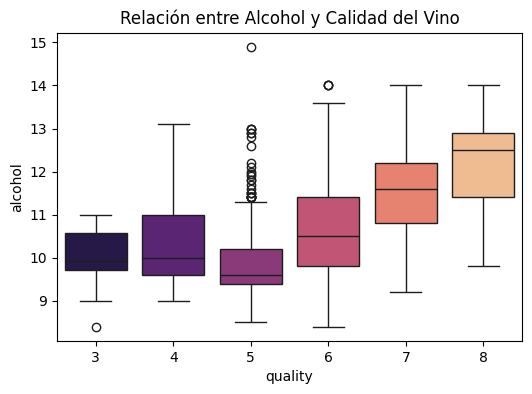

In [33]:
# Relacion entre alcohol y calidad
plt.figure(figsize=(6, 4))
sns.boxplot(x="quality", y="alcohol", data=df, palette="magma")
plt.title("Relación entre Alcohol y Calidad del Vino")
plt.show()

### Relacion entre acidez fija y acidez volatil

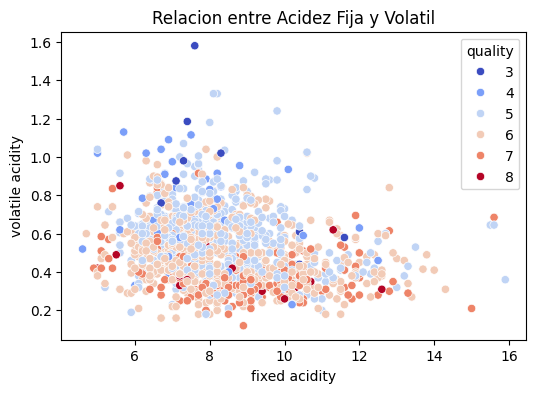

Correlación entre Acidez Fija y Acidez Volatil: -0.26
Resumen estadistico de Acidez Fija y Acidez Volátil por Calidad:
        fixed acidity                                                    \
                count      mean       std  min   25%  50%     75%   max   
quality                                                                   
3                10.0  8.360000  1.770875  6.7  7.15  7.5   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.5   8.400  12.5   
5               577.0  8.171231  1.550584  5.0  7.10  7.8   8.900  15.9   
6               535.0  8.337383  1.811032  4.7  7.00  7.9   9.400  14.3   
7               167.0  8.858683  1.973537  4.9  7.50  8.8  10.100  15.6   
8                17.0  8.441176  2.114846  5.0  7.20  7.9  10.000  12.6   

        volatile acidity                                                        
                   count      mean       std   min     25%    50%   75%    max  
quality                                    

In [34]:
# Relacion entre acidez fija y acidez volatil
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["fixed acidity"], y=df["volatile acidity"], hue=df["quality"], palette="coolwarm")
plt.title("Relacion entre Acidez Fija y Volatil")
plt.show()

# Calcular la correlacion entre acidez fija y acidez volatil
correlation_acidity = df['fixed acidity'].corr(df['volatile acidity'])
print(f"Correlación entre Acidez Fija y Acidez Volatil: {correlation_acidity:.2f}")

# Resumen estadistico de acidez fija y acidez volatil por calidad
acidity_stats_by_quality = df.groupby('quality')[['fixed acidity', 'volatile acidity']].describe()
print("Resumen estadistico de Acidez Fija y Acidez Volátil por Calidad:")
print(acidity_stats_by_quality)

### Conclusiones

1. La mayoria de los vinos en el conjunto de datos tienen una calidad media (5 y 6), lo que sugiere que la calidad promedio de los vinos analizados es buena pero no excelente. La calidad 7 tiene una representacion menor, lo que podría indicar una clase menos comun o un rango de calidad mas alto menos representado en la muestra.

2. Existe una correlacion moderada positiva entre el contenido de alcohol y la calidad del vino. Esto sugiere que, en general, los vinos con un mayor contenido de alcohol tienden a tener una mejor calificacion de calidad. Esto podría ser una indicación de que los vinos con mayor alcohol tienen características más agradables o bien equilibradas que los de menor contenido de alcohol.

3. La correlacion negativa entre acidez fija y acidez volatil sugiere que, en general, a medida que aumenta la acidez fija, la acidez volatil tiende a disminuir. Esto podria indicar que los vinos con mayor cantidad de acidez fija (mas estable) tienen menos acidez volatil, lo que puede reflejar diferencias en los perfiles de sabor y estabilidad del vino.